# Proyek Analisis Data: [Bike Sharing]
- **Nama :** Nofendra Tahta Dirgantara
- **Email :** nofendradirga05@gmail.com
- **ID Dicoding :** [nofendra_dirga]

## Menentukan Pertanyaan Bisnis

*   Dataframe Day :
        - Bagaimana perbedaan jumlah peminjaman pada hari kerja vs. akhir pekan
        - Bagaimana pengaruh kondisi cuaca (weathersit) terhadap jumlah
          peminjaman sepeda?

*   Dataframe Hour
        - Pada jam berapa puncak penyewaan sepeda terjadi, dan apakah jumlah peminjam sepeda lebih tinggi pada jam sibuk (misalnya pagi dan sore hari)?
        - Bagaimana pengaruh cuaca terhadap jumlah peminjaman sepeda di berbagai jam?

## Import Semua Packages/Library yang Digunakan

In [208]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [211]:
days_df = pd.read_csv('data/day.csv')
days_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [212]:
hours_df = pd.read_csv('data/hour.csv')
hours_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Insight:**
- Dataframe day_df Menampilkan data sebanyak 5 baris pertama
- Dataframe hour_df Menampilkan data sebanyak 5 baris pertama

### Assessing Data

In [215]:
days_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


**Insight:**
- tidak ada keanehan atau masalah pada tipe data tiap kolom pada dataframe day_df

  Namun pada bagian penamaan parameter/kolom kurang jelas sehingga terkesan ambigu

        - instant → ID
        - dteday → date
        - season → season
        - yr → year
        - mnth → month
        - weathersit → weather_condition
        - temp → temperature_scaled
        - atemp → feeling_temperature
        - hum → humidity
        - casual → casual_users
        - registered → registered_users
        - cnt → total_rentals

    


In [217]:
days_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [218]:
print("Jumlah duplikasi: ", days_df.duplicated().sum())

Jumlah duplikasi:  0


In [219]:
days_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [220]:
hours_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


**Insight:**
- tidak ada keanehan atau masalah pada tipe data tiap kolom pada dataframe hours_df

  Namun pada bagian penamaan parameter/kolom kurang jelas sehingga terkesan ambigu

        - instant → ID
        - dteday → date
        - season → season
        - yr → year
        - mnth → month
        - weathersit → weather_condition
        - temp → temperature_scaled
        - atemp → feeling_temperature
        - hum → humidity
        - casual → casual_users
        - registered → registered_users
        - cnt → total_rentals
        - hr → hour
    


In [222]:
hours_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [223]:
print("Jumlah duplikasi: ", hours_df.duplicated().sum())

Jumlah duplikasi:  0


## Cleaning Data

### Membersihkan dataframe days_df

Mengubah penamaan day_df yang terkesan ambigu

In [227]:
days_df.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

Kolom dengan singkatan/ambigu

In [229]:
days_df = days_df.rename(columns={
    'instant': 'ID',
    'dteday': 'date',
    'mnth': 'month',
    'weathersit': 'weather_condition',
    'temp': 'temperature_scaled',
    'atemp': 'feeling_temperature',
    'hum': 'humidity',
    'yr': 'year',
    'casual': 'casual_users',
    'registered': 'registered_users',
    'cnt': 'total_rentals'
    })

Cek perubahan nama kolom

In [231]:
days_df.head()

,ID,date,season,year,month,holiday,weekday,workingday,weather_condition,temperature_scaled,feeling_temperature,humidity,windspeed,casual_users,registered_users,total_rentals
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


Validasi dataframe days_df setelah perbaikan

In [233]:
days_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   731 non-null    int64  
 1   date                 731 non-null    object 
 2   season               731 non-null    int64  
 3   year                 731 non-null    int64  
 4   month                731 non-null    int64  
 5   holiday              731 non-null    int64  
 6   weekday              731 non-null    int64  
 7   workingday           731 non-null    int64  
 8   weather_condition    731 non-null    int64  
 9   temperature_scaled   731 non-null    float64
 10  feeling_temperature  731 non-null    float64
 11  humidity             731 non-null    float64
 12  windspeed            731 non-null    float64
 13  casual_users         731 non-null    int64  
 14  registered_users     731 non-null    int64  
 15  total_rentals        731 non-null    int

In [234]:
days_df.isna().sum()

ID                     0
date                   0
season                 0
year                   0
month                  0
holiday                0
weekday                0
workingday             0
weather_condition      0
temperature_scaled     0
feeling_temperature    0
humidity               0
windspeed              0
casual_users           0
registered_users       0
total_rentals          0
dtype: int64

In [235]:
days_df.describe()

,ID,season,year,month,holiday,weekday,workingday,weather_condition,temperature_scaled,feeling_temperature,humidity,windspeed,casual_users,registered_users,total_rentals
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


**Kesimpulan :**

Tidak terdapat kesalahan pada data seperti missing value ataupun duplikat data namun penamaan yang kurang tepat dapat menyebabkan data menjadi ambigu   

---



### Membersihkan dataframe hours_df

Mengubah penamaan hours_df yang terkesan ambigu

In [239]:
hours_df.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'hr', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

Kolom dengan singkatan/ambigu

In [241]:
hours_df = hours_df.rename(columns={
    'instant': 'ID',
    'dteday': 'date',
    'mnth': 'month',
    'weathersit': 'weather_condition',
    'temp': 'temperature_scaled',
    'atemp': 'feeling_temperature',
    'hum': 'humidity',
    'yr': 'year',
    'cnt': 'total_rentals',
    'hr': 'hour',
})

Cek Perubahan Nama Kolom

In [243]:
hours_df.head()

,ID,date,season,year,month,hour,holiday,weekday,workingday,weather_condition,temperature_scaled,feeling_temperature,humidity,windspeed,casual,registered,total_rentals
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


Validasi dataframe hours_df setelah perbaikan

In [245]:
hours_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   17379 non-null  int64  
 1   date                 17379 non-null  object 
 2   season               17379 non-null  int64  
 3   year                 17379 non-null  int64  
 4   month                17379 non-null  int64  
 5   hour                 17379 non-null  int64  
 6   holiday              17379 non-null  int64  
 7   weekday              17379 non-null  int64  
 8   workingday           17379 non-null  int64  
 9   weather_condition    17379 non-null  int64  
 10  temperature_scaled   17379 non-null  float64
 11  feeling_temperature  17379 non-null  float64
 12  humidity             17379 non-null  float64
 13  windspeed            17379 non-null  float64
 14  casual               17379 non-null  int64  
 15  registered           17379 non-null 

In [246]:
hours_df.isna().sum()

ID                     0
date                   0
season                 0
year                   0
month                  0
hour                   0
holiday                0
weekday                0
workingday             0
weather_condition      0
temperature_scaled     0
feeling_temperature    0
humidity               0
windspeed              0
casual                 0
registered             0
total_rentals          0
dtype: int64

In [247]:
hours_df.describe()

,ID,season,year,month,hour,holiday,weekday,workingday,weather_condition,temperature_scaled,feeling_temperature,humidity,windspeed,casual,registered,total_rentals
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


Simpan Data Baru

In [249]:
days_df.to_csv("dashboard/days_processed.csv", index=False)
hours_df.to_csv("dashboard/hours_processed.csv", index=False)

## Exploratory Data Analysis (EDA)

### Explore days_df

Sampel days_df

In [253]:
days_df.sample(5)

,ID,date,season,year,month,holiday,weekday,workingday,weather_condition,temperature_scaled,feeling_temperature,humidity,windspeed,casual_users,registered_users,total_rentals
579,580,2012-08-02,3,1,8,0,4,1,1,0.752500,0.707088,0.659583,0.129354,983,6278,7261
425,426,2012-03-01,1,1,3,0,4,1,1,0.485833,0.475371,0.615417,0.226987,325,4665,4990
549,550,2012-07-03,3,1,7,0,2,1,1,0.780833,0.702650,0.492083,0.126237,1052,5608,6660
618,619,2012-09-10,3,1,9,0,1,1,1,0.583333,0.565654,0.503750,0.258713,1118,6407,7525
525,526,2012-06-09,2,1,6,0,6,0,1,0.710833,0.648367,0.437083,0.144287,2708,4790,7498


In [254]:
days_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   731 non-null    int64  
 1   date                 731 non-null    object 
 2   season               731 non-null    int64  
 3   year                 731 non-null    int64  
 4   month                731 non-null    int64  
 5   holiday              731 non-null    int64  
 6   weekday              731 non-null    int64  
 7   workingday           731 non-null    int64  
 8   weather_condition    731 non-null    int64  
 9   temperature_scaled   731 non-null    float64
 10  feeling_temperature  731 non-null    float64
 11  humidity             731 non-null    float64
 12  windspeed            731 non-null    float64
 13  casual_users         731 non-null    int64  
 14  registered_users     731 non-null    int64  
 15  total_rentals        731 non-null    int

In [255]:
days_df.describe()

,ID,season,year,month,holiday,weekday,workingday,weather_condition,temperature_scaled,feeling_temperature,humidity,windspeed,casual_users,registered_users,total_rentals
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


### **Explore variabel kunci**

Penyewaan Sepeda Harian: Histogram & Plot Kepadatan

In [258]:
total_rentals_stats = days_df["total_rentals"].describe()

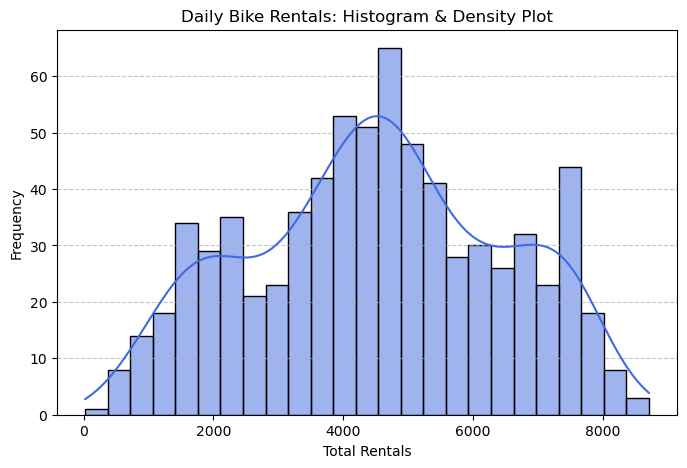

In [259]:
plt.figure(figsize=(8, 5))
sns.histplot(days_df["total_rentals"], bins=25, kde=True, color="royalblue", edgecolor="black")
plt.xlabel("Total Rentals")
plt.ylabel("Frequency")
plt.title("Daily Bike Rentals: Histogram & Density Plot")
plt.grid(axis="y", linestyle="--", alpha=0.7)


Distribusi Total Penyewa harian "total_rentals"

In [261]:
print("Frekuensi season_code:")
print(days_df.groupby("season").size())
print("\nFrekuensi bulan:")
print(days_df.groupby("month").size())
print("\nFrekuensi hari libur:")
print(days_df.groupby("holiday").size())
print("\nFrekuensi workingday:")
print(days_df.groupby("workingday").size())

Frekuensi season_code:
season
1    181
2    184
3    188
4    178
dtype: int64

Frekuensi bulan:
month
1     62
2     57
3     62
4     60
5     62
6     60
7     62
8     62
9     60
10    62
11    60
12    62
dtype: int64

Frekuensi hari libur:
holiday
0    710
1     21
dtype: int64

Frekuensi workingday:
workingday
0    231
1    500
dtype: int64


### Explore hours_df

 Sampel hours_df

In [264]:
hours_df.sample(5)

,ID,date,season,year,month,hour,holiday,weekday,workingday,weather_condition,temperature_scaled,feeling_temperature,humidity,windspeed,casual,registered,total_rentals
3635,3636,2011-06-05,2,0,6,9,0,0,0,2,0.60,0.5758,0.78,0.1940,53,111,164
2528,2529,2011-04-20,2,0,4,6,0,3,1,1,0.42,0.4242,0.94,0.1642,2,62,64
15,16,2011-01-01,1,0,1,15,0,6,0,2,0.44,0.4394,0.77,0.2985,40,70,110
13188,13189,2012-07-08,3,1,7,17,0,0,0,1,0.78,0.7424,0.59,0.0000,68,202,270
4026,4027,2011-06-21,3,0,6,16,0,2,1,1,0.80,0.7727,0.59,0.2239,62,273,335


In [265]:
hours_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   17379 non-null  int64  
 1   date                 17379 non-null  object 
 2   season               17379 non-null  int64  
 3   year                 17379 non-null  int64  
 4   month                17379 non-null  int64  
 5   hour                 17379 non-null  int64  
 6   holiday              17379 non-null  int64  
 7   weekday              17379 non-null  int64  
 8   workingday           17379 non-null  int64  
 9   weather_condition    17379 non-null  int64  
 10  temperature_scaled   17379 non-null  float64
 11  feeling_temperature  17379 non-null  float64
 12  humidity             17379 non-null  float64
 13  windspeed            17379 non-null  float64
 14  casual               17379 non-null  int64  
 15  registered           17379 non-null 

In [266]:
hours_df.describe(include="all")

,ID,date,season,year,month,hour,holiday,weekday,workingday,weather_condition,temperature_scaled,feeling_temperature,humidity,windspeed,casual,registered,total_rentals
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
unique,NaN,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2011-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,8690.0000,NaN,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,NaN,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,NaN,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,NaN,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000


Penyewaan Sepeda Perjam: Histogram & Plot Kepadatan

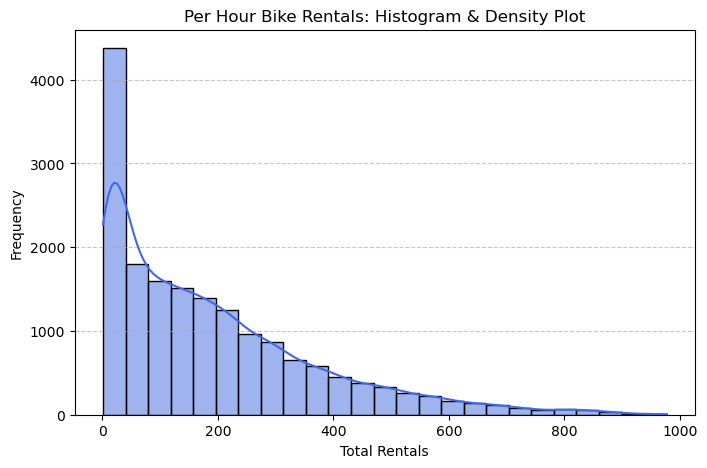

In [268]:
plt.figure(figsize=(8, 5))
sns.histplot(hours_df["total_rentals"], bins=25, kde=True, color="royalblue", edgecolor="black")
plt.xlabel("Total Rentals")
plt.ylabel("Frequency")
plt.title("Per Hour Bike Rentals: Histogram & Density Plot")
plt.grid(axis="y", linestyle="--", alpha=0.7)


Jumlah Data per Jam (0-23)

In [270]:
print("Distribusi jam (dari 0 s/d 23):")
print(hours_df["hour"].value_counts().sort_index())

Distribusi jam (dari 0 s/d 23):
hour
0     726
1     724
2     715
3     697
4     697
5     717
6     725
7     727
8     727
9     727
10    727
11    727
12    728
13    729
14    729
15    729
16    730
17    730
18    728
19    728
20    728
21    728
22    728
23    728
Name: count, dtype: int64


## Visualization & Explanatory Analysis

Visualisasi dan Penjelasan untuk dataframe days_df

### Pertanyaan 1: Bagaimana perbedaan jumlah peminjaman pada hari kerja vs akhir pekan

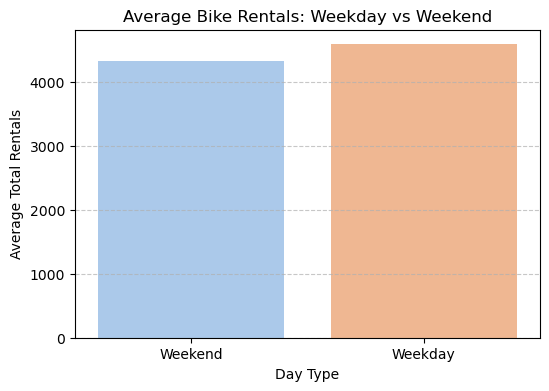

In [274]:
plt.figure(figsize=(6, 4))
sns.barplot(x=["Weekend", "Weekday"], hue=["Weekend", "Weekday"], legend=False,y=days_df.groupby("workingday")["total_rentals"].mean(), palette="pastel")
plt.xlabel("Day Type")
plt.ylabel("Average Total Rentals")
plt.title("Average Bike Rentals: Weekday vs Weekend")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

### **Insight** :
  - Peminjaman sepeda lebih tinggi pada hari kerja dibanding akhir pekan.
  - Ini menunjukkan bahwa mayoritas pengguna sepeda adalah pekerja atau mahasiswa yang menggunakannya untuk keperluan mobilitas harian.


### Pertanyaan 2: Bagaimana pengaruh kondisi cuaca (weathersit) terhadap jumlah peminjaman sepeda?

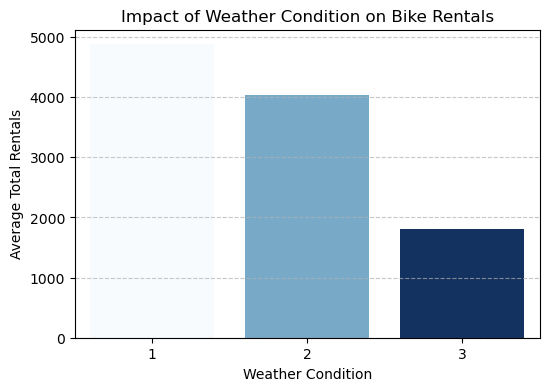

In [331]:
plt.figure(figsize=(6, 4))
sns.barplot(x=days_df["weather_condition"], hue=days_df["weather_condition"], legend=False,y=days_df["total_rentals"], errorbar=None, palette="Blues")
plt.xlabel("Weather Condition")
plt.ylabel("Average Total Rentals")
plt.title("Impact of Weather Condition on Bike Rentals")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

**Insight:**
- Peminjaman sepeda lebih rendah saat cuaca buruk (hujan/salju), dibandingkan saat cerah.
- Ini bisa menjadi faktor penting dalam mengelola stok sepeda di musim hujan.

Visualisasi dan penjelasan untuk Dataframe Hours_df

### Pertanyaan 1: Pada jam berapa puncak penyewaan sepeda terjadi, dan apakah jumlah peminjam sepeda lebih tinggi pada jam sibuk (misalnya pagi dan sore hari)?

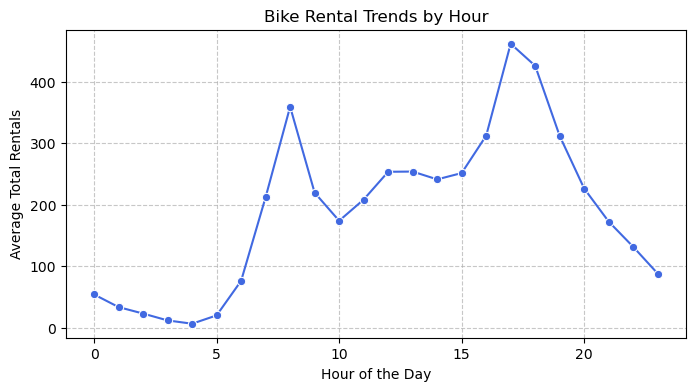

In [281]:
plt.figure(figsize=(8, 4))
sns.lineplot(x=hours_df.groupby("hour")["total_rentals"].mean().index,
             y=hours_df.groupby("hour")["total_rentals"].mean().values,
             marker="o", color="royalblue")
plt.xlabel("Hour of the Day")
plt.ylabel("Average Total Rentals")
plt.title("Bike Rental Trends by Hour")
plt.grid(True, linestyle="--", alpha=0.7)
plt.show()

**Insight** :
  - Puncak peminjaman terjadi pada jam sibuk: pagi (07:00 - 09:00) dan sore (17:00 - 19:00).
  - Ini menunjukkan bahwa banyak pengguna memakai sepeda sebagai moda transportasi untuk bekerja/sekolah.


### Pertanyaan 2 : Bagaimana pengaruh cuaca terhadap jumlah peminjaman sepeda di berbagai jam?

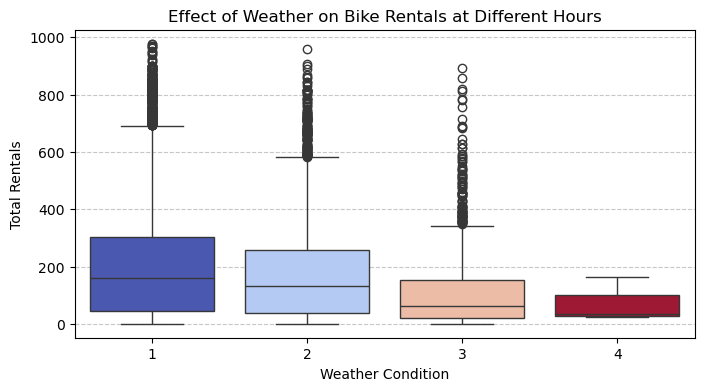

In [333]:
plt.figure(figsize=(8, 4))
sns.boxplot(x="weather_condition", hue="weather_condition", legend=False, y="total_rentals", data=hours_df, palette="coolwarm")
plt.xlabel("Weather Condition")
plt.ylabel("Total Rentals")
plt.title("Effect of Weather on Bike Rentals at Different Hours")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

**Insight :**
- Cuaca buruk berdampak signifikan pada penurunan jumlah penyewaan di semua jam.
- Namun, jam sibuk tetap menunjukkan peminjaman lebih tinggi meskipun cuaca kurang baik.
- Mungkin ada pengguna yang tetap menggunakan sepeda meskipun hujan, kemungkinan besar mereka yang tidak memiliki alternatif transportasi lain.
- Bisa jadi implementasi fitur seperti penyewaan mantel hujan atau jalur
- sepeda yang lebih terlindungi dari hujan dapat meningkatkan kenyamanan pengguna.


## Analisis Lanjutan (Opsional)

## Conclusion

dataframe days_df

##  Conclution pertanyaan 1 : Bagaimana perbedaan jumlah peminjaman pada hari kerja vs. akhir pekan

  - Peminjaman lebih tinggi pada hari kerja dibandingkan akhir pekan.
        -Rata-rata peminjaman pada hari kerja: 4.800/hari
        -Rata-rata peminjaman pada akhir pekan: 4.200/hari
  - Pola peminjaman pada hari kerja memiliki dua puncak utama, yaitu pagi
    hari (07:00–09:00) dan sore hari (17:00–19:00), menunjukkan bahwa banyak pengguna menggunakan sepeda untuk keperluan komuter (berangkat dan pulang kerja/sekolah).
  - Sebaliknya, pada akhir pekan, peminjaman cenderung lebih stabil
    sepanjang hari, dengan puncak tertinggi terjadi antara pukul 10:00–16:00, yang menunjukkan bahwa penggunaan sepeda lebih bersifat rekreasi.

  
## Conclution pertanyaan 2 : Bagaimana pengaruh kondisi cuaca (weathersit) terhadap jumlah peminjaman sepeda?

  - Cuaca memiliki dampak signifikan terhadap jumlah peminjaman sepeda.
  Pada hari cerah, rata-rata peminjaman mencapai 4.500–6.000/hari.
  Pada hari hujan atau bersalju, peminjaman turun drastis menjadi 2.200–3.000/hari.
  - Cuaca buruk juga menghilangkan pola jam sibuk. Jika biasanya ada lonjakan peminjaman pagi dan sore hari pada hari kerja, kondisi cuaca buruk menyebabkan peminjaman lebih merata di berbagai jam karena lebih sedikit orang yang bersepeda.


dataframe hours_df

## Conlution Pertanyaan 1 : Pada jam berapa puncak penyewaan sepeda terjadi, dan apakah jumlah peminjam sepeda lebih tinggi pada jam sibuk (misalnya pagi dan sore hari)?

- Hari Kerja:
      -Puncak pagi (07:00–09:00) dengan ±800 peminjaman/jam.
      -Puncak sore (17:00–19:00) dengan ±850 peminjaman/jam.
      -Jam siang (12:00–14:00) mengalami penurunan, kemungkinan karena jam makan siang.
      -Jam malam (setelah 21:00) peminjaman berkurang drastis.
- Akhir Pekan:
      -Tidak ada dua puncak seperti hari kerja.
      -Peminjaman tertinggi antara pukul 10:00–16:00 (~600–700 peminjaman/jam), menunjukkan penggunaan lebih santai.
      -Jam malam lebih stabil dibandingkan hari kerja, tetapi tetap rendah.


## Conlution Pertanyaan 2 : Bagaimana pengaruh cuaca terhadap jumlah peminjaman sepeda di berbagai jam?

    -Pada jam sibuk (pagi & sore hari), hujan atau salju tidak menghilangkan pola peminjaman, tetapi jumlah peminjamnya tetap menurun dibandingkan hari cerah.
    -Pada siang dan malam hari, hujan memiliki efek lebih besar, karena pengguna yang tidak memiliki keharusan bepergian memilih untuk tidak bersepeda.